<div class="alert alert-block alert-info">
    <h2 align="center">US Presidents</h2>
    <h4 align="center"><a href="https://t.me/afsharino">Mohammad Afshari</a></h4>
</div>

<style>
.aligncenter {
    text-align: center;
}
</style>
<p class="aligncenter">
    <img src = "../images/us-prsidents.jpg"  width=70%>
</p>

# Import Libraries

In [33]:
# Scientific
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset

In [2]:
data = pd.read_csv('../dataset/president_heights.csv', index_col=False)

# Inspect the Data

In [3]:
data.head()

,order,name,height(cm)
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   order       44 non-null     int64 
 1   name        44 non-null     object
 2   height(cm)  44 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [5]:
data.describe()

,order,height(cm)
count,44.000000,44.000000
mean,23.522727,180.045455
std,13.729087,7.064337
min,1.000000,163.000000
25%,11.750000,174.750000
50%,24.000000,182.000000
75%,35.250000,183.500000
max,46.000000,193.000000


## 01. Presidents with height lower than 180 cm.

In [6]:
data[data['height(cm)'] < 180][['name']]

,name
1,John Adams
3,James Madison
5,John Quincy Adams
7,Martin Van Buren
8,William Henry Harrison
10,James K. Polk
11,Zachary Taylor
12,Millard Fillmore
13,Franklin Pierce
16,Andrew Johnson


## 02. Rosvelt height?

In [7]:
names = [str(data[data['name']==name]['name']).split('\n')[0].split('    ')[1] for name in data.name if 'Roosevelt' in name]
pd.concat([data[names[0]== data['name']] , data[names[1]== data['name']]])

,order,name,height(cm)
23,26,Theodore Roosevelt,178
29,32,Franklin D. Roosevelt,188


## 03. The tallest president?

In [8]:
data.loc[data['height(cm)'] == data['height(cm)'].max()]

,order,name,height(cm)
15,16,Abraham Lincoln,193
33,36,Lyndon B. Johnson,193


## 04. The time of being president

In [9]:
data[data['height(cm)'] == data['height(cm)'].max()][['name','order']]

,name,order
15,Abraham Lincoln,16
33,Lyndon B. Johnson,36


## 05. Presidents taller than Obama

In [10]:
obama = [str(data[data['name']==name]['name']).split('\n')[0].split('    ')[1] for name in data.name if 'Obama' in name][0]

In [11]:
obama_height = data[data['name'] == obama]['height(cm)'].values[0]
print(f'Height of Obama is {obama_height}.')

Height of Obama is 185.


In [12]:
data[data['height(cm)'] > obama_height][['name', 'height(cm)']]

,name,height(cm)
0,George Washington,189
2,Thomas Jefferson,189
15,Abraham Lincoln,193
29,Franklin D. Roosevelt,188
33,Lyndon B. Johnson,193
38,George H. W. Bush,188
39,Bill Clinton,188
42,Donald Trump,191


## 06. Presidents with same height

In [18]:
groups = data.groupby('height(cm)').apply(lambda x: x['name'].to_list()).to_dict()

In [22]:
filtered_groups = {height:names for height, names in groups.items() if (len(groups[height]) > 1)}

In [23]:
for height, names in filtered_groups.items():
    print(f"Presidents with height {height} cm:")
    for name in names:
        print(name)
    print("-------------")

Presidents with height 168 cm:
Martin Van Buren
Benjamin Harrison
-------------
Presidents with height 170 cm:
John Adams
William McKinley
-------------
Presidents with height 173 cm:
William Henry Harrison
James K. Polk
Zachary Taylor
Ulysses S. Grant
-------------
Presidents with height 175 cm:
Millard Fillmore
Harry S. Truman
-------------
Presidents with height 178 cm:
Franklin Pierce
Andrew Johnson
Theodore Roosevelt
Calvin Coolidge
-------------
Presidents with height 182 cm:
William Howard Taft
Herbert Hoover
Richard Nixon
George W. Bush
Joseph Biden
-------------
Presidents with height 183 cm:
James Monroe
John Tyler
James Buchanan
James A. Garfield
Chester A. Arthur
Warren G. Harding
John F. Kennedy
Gerald Ford
-------------
Presidents with height 185 cm:
Andrew Jackson
Ronald Reagan
Barack Obama
-------------
Presidents with height 188 cm:
Franklin D. Roosevelt
George H. W. Bush
Bill Clinton
-------------
Presidents with height 189 cm:
George Washington
Thomas Jefferson
-----

## 07. Plot The Data

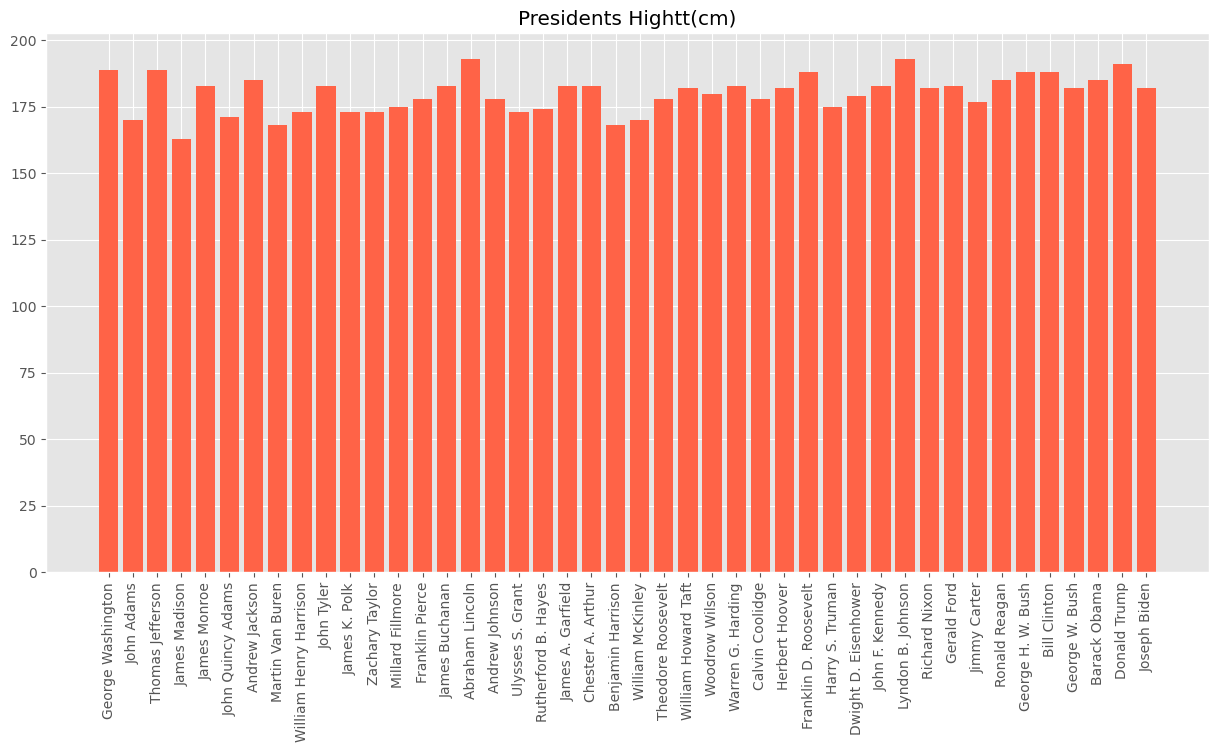

In [66]:
fig = plt.figure(figsize = (15, 7))
plt.bar(data['name'], data['height(cm)'],color='tomato', width = 0.8)
plt.style.use('ggplot')
plt.title('Presidents Hight(cm)')
plt.xticks(rotation=90)
plt.show()